In [37]:
import numpy 
import pandas
import matplotlib.pyplot as plot


Matplotlib is building the font cache; this may take a moment.


In [38]:
columns_to_read = ['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'population', 'people_fully_vaccinated',
'median_age', 'aged_65_older', 'cardiovasc_death_rate', 'diabetes_prevalence']



In [39]:
dataset = pandas.read_csv('owid-covid-data_top10.csv', sep=',', encoding='utf-8' ,usecols=columns_to_read)

dataset['year_month'] = dataset['date'].str.slice(0,7)

In [40]:
dataset['year_month']                               

0       2020-02
1       2020-02
2       2020-02
3       2020-02
4       2020-03
5       2020-03
6       2020-03
7       2020-03
8       2020-03
9       2020-03
10      2020-03
11      2020-03
         ...   
7651    2022-02
7652    2022-02
7653    2022-02
7654    2022-02
7655    2022-02
7656    2022-02
7657    2022-02
7658    2022-03
7659    2022-03
7660    2022-03
7661    2022-03
7662    2022-03
Name: year_month, Length: 7663, dtype: object

In [41]:
covid_by_month = dataset.groupby(
    by=['location', 'year_month'], 
    as_index=False
    ).agg(
        total_cases = ('total_cases', 'max'),
        new_cases = ('new_cases', 'sum'),
        total_deaths = ('total_deaths', 'max'),
        new_deaths = ('new_deaths', 'sum'),
        population = ('population', 'mean'),
        people_fully_vaccinated = ('people_fully_vaccinated', 'max'),
        median_age = ('median_age', 'max'),
        aged_65_older = ('aged_65_older', 'mean'),
        cardiovasc_death_rate = ('cardiovasc_death_rate', 'max'),
        diabetes_prevalence = ('diabetes_prevalence', 'max')
    )

In [42]:
pandas.set_option('display.max_rows',0)
covid_by_month

,location,year_month,total_cases,new_cases,total_deaths,new_deaths,population,people_fully_vaccinated,median_age,aged_65_older,cardiovasc_death_rate,diabetes_prevalence
0,Brazil,2020-02,2.0,2.0,NaN,0.0,213993441.0,NaN,33.5,8.552,177.961,8.11
1,Brazil,2020-03,5717.0,5715.0,201.0,201.0,213993441.0,NaN,33.5,8.552,177.961,8.11
2,Brazil,2020-04,87187.0,81470.0,6006.0,5805.0,213993441.0,NaN,33.5,8.552,177.961,8.11
3,Brazil,2020-05,516137.0,428950.0,29367.0,23361.0,213993441.0,NaN,33.5,8.552,177.961,8.11
4,Brazil,2020-06,1412669.0,916328.0,59792.0,30425.0,213993441.0,NaN,33.5,8.552,177.961,8.11
5,Brazil,2020-07,2670451.0,1257782.0,92728.0,32936.0,213993441.0,NaN,33.5,8.552,177.961,8.11
6,Brazil,2020-08,3914829.0,1244378.0,121618.0,28890.0,213993441.0,NaN,33.5,8.552,177.961,8.11
7,Brazil,2020-09,4817365.0,902536.0,144078.0,22460.0,213993441.0,NaN,33.5,8.552,177.961,8.11
8,Brazil,2020-10,5537763.0,720398.0,159972.0,15894.0,213993441.0,NaN,33.5,8.552,177.961,8.11
...,...,...,...,...,...,...,...,...,...,...,...,...


In [43]:
covid_by_month.fillna(0,inplace=True)
covid_by_month


,location,year_month,total_cases,new_cases,total_deaths,new_deaths,population,people_fully_vaccinated,median_age,aged_65_older,cardiovasc_death_rate,diabetes_prevalence
0,Brazil,2020-02,2.0,2.0,0.0,0.0,213993441.0,0.0,33.5,8.552,177.961,8.11
1,Brazil,2020-03,5717.0,5715.0,201.0,201.0,213993441.0,0.0,33.5,8.552,177.961,8.11
2,Brazil,2020-04,87187.0,81470.0,6006.0,5805.0,213993441.0,0.0,33.5,8.552,177.961,8.11
3,Brazil,2020-05,516137.0,428950.0,29367.0,23361.0,213993441.0,0.0,33.5,8.552,177.961,8.11
4,Brazil,2020-06,1412669.0,916328.0,59792.0,30425.0,213993441.0,0.0,33.5,8.552,177.961,8.11
5,Brazil,2020-07,2670451.0,1257782.0,92728.0,32936.0,213993441.0,0.0,33.5,8.552,177.961,8.11
6,Brazil,2020-08,3914829.0,1244378.0,121618.0,28890.0,213993441.0,0.0,33.5,8.552,177.961,8.11
7,Brazil,2020-09,4817365.0,902536.0,144078.0,22460.0,213993441.0,0.0,33.5,8.552,177.961,8.11
8,Brazil,2020-10,5537763.0,720398.0,159972.0,15894.0,213993441.0,0.0,33.5,8.552,177.961,8.11
...,...,...,...,...,...,...,...,...,...,...,...,...


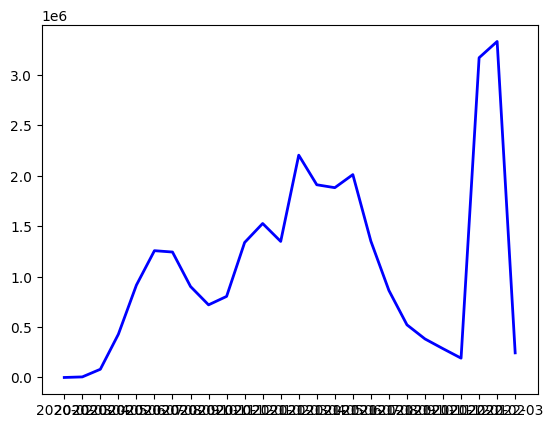

In [45]:
covid_by_month_in_brazil = covid_by_month[covid_by_month['location'].isin(['Brazil'])]
plot.plot(covid_by_month_in_brazil['year_month'], covid_by_month_in_brazil['new_cases'], 'b-' , linewidth=2)
plot.show()